## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


---

# My Report

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from pathlib import Path
import json

# You may need to install this progress bar package 
# by 'pip install tqdm'.
from ipywidgets import FloatProgress
from tqdm.keras import TqdmCallback


random_seed = 1901276
dataset_path = Path('./dataset')
output_path = Path('./output')
np.random.seed(1901276)


## Part 1: Data Loading, Exploration and Baseline

Objective:

1. Load data from a CSV file into a Dataframe.
2. Visualize the label distribution using bar plots.
3. Convert the input data into images for sample visualization.

Below are the classes and functions used in this section.

In [16]:
#
# A useful class for data processing
#
class LetterConverter:
    """Convert between number, letter and index.
    <num> 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
    <let>  A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P  Q  R  S  T  U  V  W  X  Y  Z
    <ind> 00 01 02 03 04 05 06 07 08    09 10 11 12 13 14 15 16 17 18 19 20 21 22 23
    """
    letter_order = None
    letter_index = None

    @classmethod
    def init_static(cls, *except_letters):
        cls.letter_order = [chr(x + ord('A')) for x in range(26)]
        for letter in except_letters:
            cls.letter_order.remove(letter)
        cls.letter_index = {x: i for i, x in enumerate(cls.letter_order)}

    @classmethod
    def num2cap(cls, num):
        return chr(num + ord('A'))

    @classmethod
    def cap2idx(cls, cap):
        return cls.letter_index[cap]
    
    @classmethod
    def num2idx(cls, num):
        return cls.cap2idx(cls.num2cap(num))
    
    @classmethod
    def idx2cap(cls, idx):
        return cls.letter_order[idx]


#
# Function for data visualizing
#
def data_visualize(df_dataset, dataset_label='Anonymous'):
    # Draw histogram
    plt.figure(figsize=(12, 3))
    label = df_dataset['label'].apply(LetterConverter.num2cap)
    label_sum = label.value_counts().sort_index()
    plt.bar(label_sum.index, label_sum.values)
    plt.title(f'Class Distribution of {dataset_label}')
    plt.show()

    # Draw sampled result
    sampled = df_dataset.groupby('label').sample()
    sampled_label = sampled['label'].values
    sampled_pixel = sampled.drop('label', axis=1).values
    sampled_img = sampled_pixel.reshape(-1, 32, 32)  # [N, 32, 32]
    fig, axes = plt.subplots(4, 6, figsize=(12, 8))
    fig.suptitle(f'Sampled images from {dataset_label}')
    for h in range(4):
        for w in range(6):
            k = h * 6 + w
            axes[h, w].imshow(sampled_img[k], cmap='gray')
            axes[h, w].set_title(LetterConverter.num2cap(sampled_label[k]))
            axes[h, w].axis('off')
    plt.show()

### 1.1 Data Loading

Load, split, and preprocess the data for subsequent processing.

In [17]:
#
# Load data
#
LetterConverter.init_static('J', 'Z')
df_train = pd.read_csv(str(dataset_path / 'sign_mnist_train.csv'))
df_test_all = pd.read_csv(str(dataset_path / 'sign_mnist_test.csv'))


#
# Data Splitting
#
# Justification: The data has been thoroughly verified, and any errors 
# have already been corrected by the client. 
# Therefore, we skip checking the data distribution at this stage. 
# If any issues arise later, they can still be identified and addressed. 
# For now, we proceed with directly splitting the data.
#
df_test, df_valid, _, _ = train_test_split(
    df_test_all, df_test_all['label'], test_size=0.2, 
    random_state=random_seed, stratify=df_test_all['label']
)
print('Training data loaded:', df_train.shape[0])
print('Testing data loaded in total:', df_test_all.shape[0])
print('\tFor validation:', df_valid.shape[0])
print('\tFor testing:', df_test.shape[0])

#
# Preprocess for deep learning methods
#
# 1. X: drop the label part and scale it.
scale_ppl = Pipeline([
    ('scaler', MinMaxScaler((0, 255)))
])
X_train = df_train.drop('label', axis=1).values
X_valid = df_valid.drop('label', axis=1).values
X_test = df_test.drop('label', axis=1).values
X_train_p = scale_ppl.fit_transform(X_train)
X_valid_p = scale_ppl.fit_transform(X_valid)
X_test_p = scale_ppl.fit_transform(X_test)

# 2. Y: Remove the missing label to avoid misclassification.
y_train_p = df_train['label'].apply(LetterConverter.num2idx).values
y_valid_p = df_valid['label'].apply(LetterConverter.num2idx).values
y_test_p = df_test['label'].apply(LetterConverter.num2idx).values

dataset = {
    'X_train': X_train_p,
    'y_train': y_train_p,
    'X_valid': X_valid_p,
    'y_valid': y_valid_p
}
for key, value in dataset.items():
    print(key, value.shape)


Training data loaded: 27455
Testing data loaded in total: 7172
	For validation: 1435
	For testing: 5737
X_train (27455, 1024)
y_train (27455,)
X_valid (1435, 1024)
y_valid (1435,)


### 1.2 Exploration

Visualize the data for each dataset: Train, Validation, and Test.

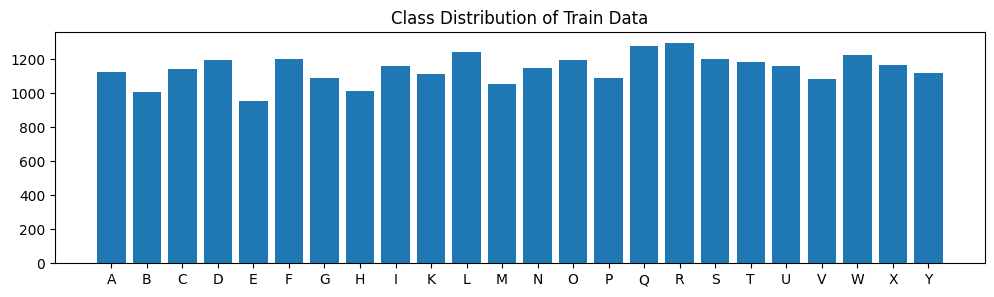

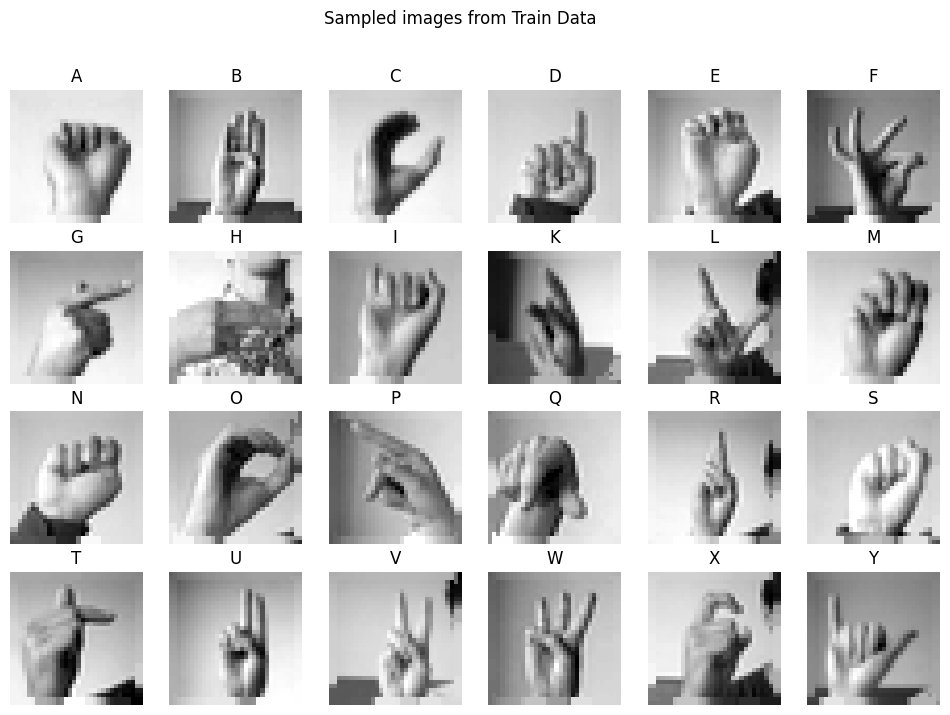

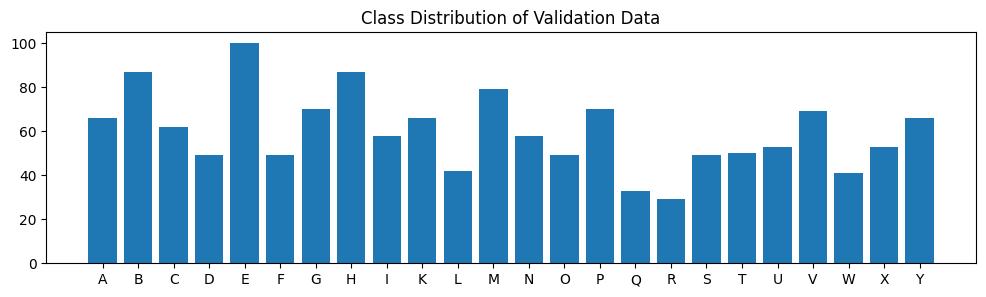

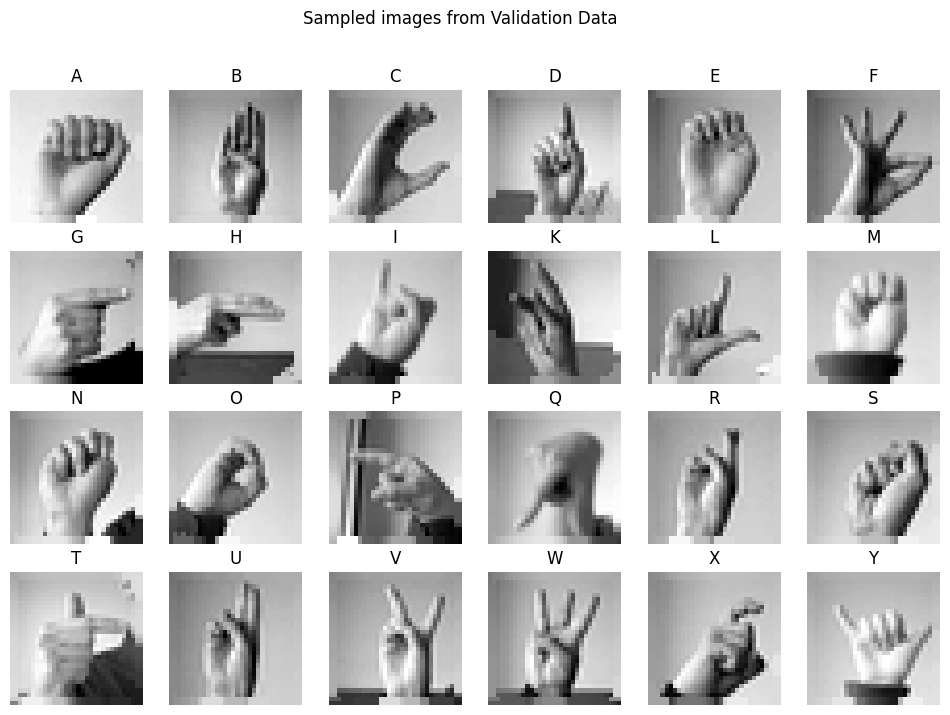

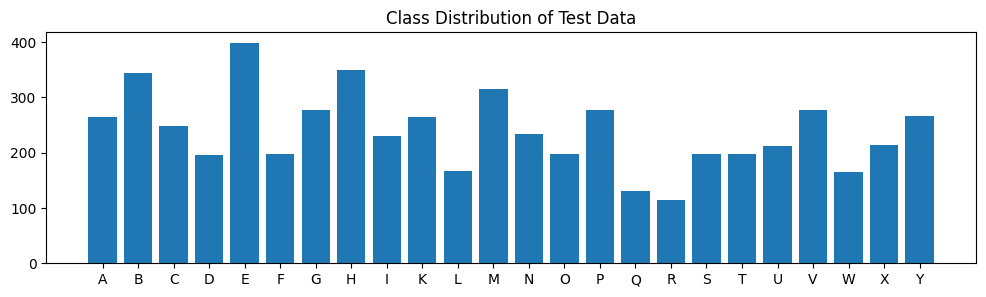

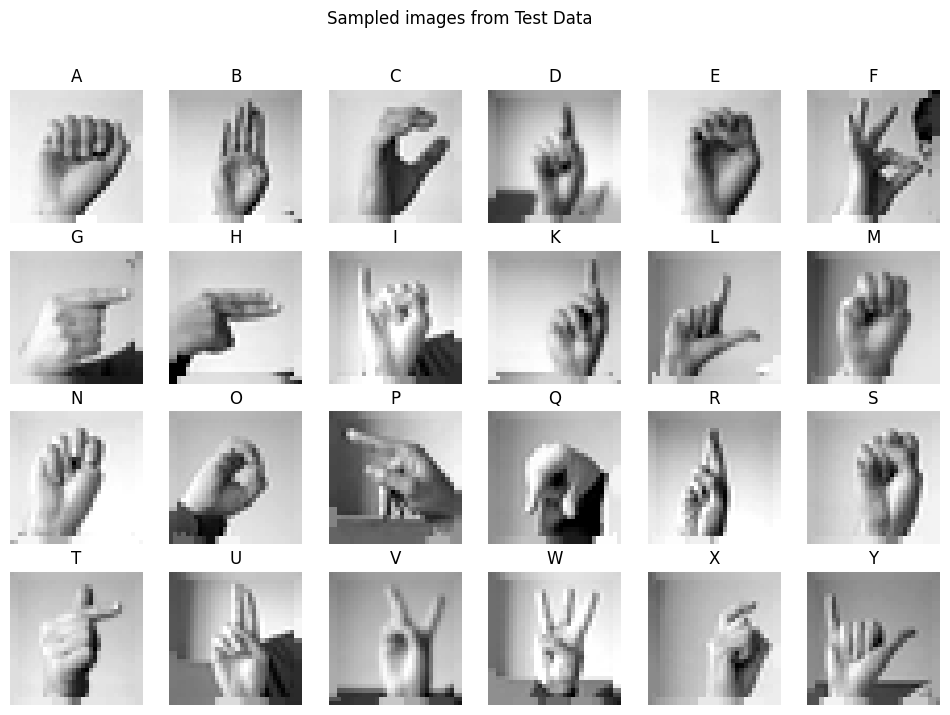

In [59]:
data_visualize(df_train, 'Train Data')
data_visualize(df_valid, 'Validation Data')
data_visualize(df_test, 'Test Data')

### 1.3 Baseline Designing

Given a limit of 50 total training runs, we allocate these evenly between DNN and CNN models:

- 25 training runs for DNNs
- 25 training runs for CNNs

In this section, we define the hyperparameter models and train the baselines.

In [60]:
#
# Base class for DNN & CNN
#
class NetworkRunner:
    def __init__(self, output_dir, class_type, input_channel, 
                 n_classes, dataset, hyper_paras):
        
        # Dictionary path for results saving
        self.output_dir = output_dir

        # Class type, used for output & report. CNN or DNN.
        self.class_type = class_type

        # Input and output shape
        self.in_ch = input_channel
        self.n_cls = n_classes

        # Dataset for the network
        self.X_train = dataset['X_train']
        self.y_train = dataset['y_train']
        self.X_valid = dataset['X_valid']
        self.y_valid = dataset['y_valid']

        # Used for hyperparameter tuning.
        self.hyper_paras = hyper_paras.copy()
        self.best_choice = None

        # Counter of training runs
        self.trial_num = 0

    @staticmethod
    def get_optimizer(optimizer_name):
        """Return optimizer object given the string"""
        if optimizer_name == 'sgd':
            return tf.keras.optimizers.SGD
        elif optimizer_name == 'adam':
            return tf.keras.optimizers.Adam
        elif optimizer_name == 'rmsprop':
            return tf.keras.optimizers.RMSprop
        elif optimizer_name == 'nadam':
            return tf.keras.optimizers.Nadam
        else:
            raise NotImplementedError(f'Unknown optimizer {optimizer_name}')
    
    def get_best_paras(self, set_to_baseline=False):
        if set_to_baseline:
            self.best_choice = {x: self.hyper_paras[x][0] for x in self.hyper_paras}
        return self.best_choice.copy()

    def model_factory(self, layer_num, hidden_size, actfn, dropout_rate):
        """Different in DNN & CNN"""
        raise NotImplementedError('Function not implemented by base class')

    def fit_model(self, layer_num, hidden_size, actfn, learning_rate,
                  dropout_rate, batch_size, optimizer, print_out=True):
        """For model fitting and result saving given a set of hyperparameters."""

        if print_out:
            print(f'Running {self.trial_num}:')

        epoch_num = 150

        # Title for plotting, showing all the hyperparameters.
        exp_tag = '_'.join(map(str, [self.class_type, layer_num, hidden_size,
                                     actfn, learning_rate, dropout_rate,
                                     batch_size, optimizer]))

        # Create model from model_factory
        model = self.model_factory(layer_num, hidden_size, actfn, dropout_rate)
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=self.get_optimizer(optimizer)(learning_rate),
                      metrics=['accuracy'])
        
        # Fitting the model from given training set
        callback_list = [
            TqdmCallback(verbose=1),
            tf.keras.callbacks.EarlyStopping(patience=20, 
                                             restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.2, 
                                                 patience=10)
        ]
        history = model.fit(self.X_train, self.y_train,
                            epochs=epoch_num,
                            batch_size=batch_size,
                            callbacks=callback_list,
                            validation_data=[self.X_valid, self.y_valid],
                            verbose=0)
        
        # Compute the performance on the validation dataset
        y_pred_prob = model.predict(self.X_valid, 
                                    verbose=0)  # Slience output, since we have tqdm
        y_pred = np.argmax(y_pred_prob, axis=1)
        max_train_acc = np.max(history.history['accuracy'])
        max_val_acc = np.max(history.history['val_accuracy'])
        cr = classification_report(self.y_valid, y_pred, 
                                   output_dict=True, zero_division=1)
        avg_results = cr.get('weighted avg', {})
        cm = confusion_matrix(self.y_valid, y_pred)

        # Prepare the saving file path
        trial_dir = self.output_dir / f'trial_{self.trial_num:02d}'
        trial_dir.mkdir(parents=True, exist_ok=True)
        model_name = trial_dir / f'{exp_tag}.keras'
        res_path = trial_dir / f'{exp_tag}.json'

        result = {
            'trail_num': self.trial_num,
            'res_file': str(res_path),
            'model_file': str(model_name),
            'exp_tag': exp_tag,
            'layer_num': layer_num,
            'hidden_size': hidden_size,
            'actfn': actfn,
            'learning_rate': learning_rate,
            'dropout_rate': dropout_rate,
            'batch_size': batch_size, 
            'optimizer': optimizer,
            'epochs': len(history.epoch),
            'parameters': model.count_params(),
            'max_train_acc': max_train_acc,
            'max_val_acc': max_val_acc,
            'precision': avg_results.get('precision', None),
            'recall': avg_results.get('recall', None),
            'f1_score': avg_results.get('f1-score', None),
            'confusion_matrix': json.dumps(cm.tolist(), default=lambda x: float(x)),
            'history': history.history
        }

        # Save model & result
        model.save(str(model_name))
        with open(str(res_path), 'w') as file:
            json.dump(result, file, default=lambda x: float(x))

        del model
        tf.keras.backend.clear_session()

        if print_out:
            print(f'Trail {self.trial_num} completed ({result["exp_tag"]})')
            print(f'\tTrain / Val Acc: {result["max_train_acc"]:.4f} / {result["max_val_acc"]:.4f}')

        return result

    def run_baseline(self):
        """Fit the model given the default parameters."""
        print(f'Baseline of {self.class_type}:')
        kwargs = self.get_best_paras(set_to_baseline=True)
        res = self.fit_model(**kwargs)
        return res

    def step_search(self, baseline_res=None):
        """Given a set of hyperparameters, search them one-by-one and find the best. """
        if baseline_res is None:
            baseline_res = self.run_baseline()
        self.trial_num += 1
        
        # all_res (List):
        # Stores all running results in the order of trial number.
        # The baseline results are placed first in this list.
        all_res = [baseline_res]

        # compare_idx (Dict):
        # This dictionary stores the index of trials in different 
        # hyperparameters groups. For example, if we consider the 
        # hyperparameter groups 'learning_rate' and 'actfn',
        # the dictionary would look like this:
        # compare_idx = {
        #   'learning_rate' : {
        #       '0.01':         0, 
        #       '0.001':        1,
        #       '0.0001':       2, 
        #       '0.1':          3
        #   },
        #   'actfn': {
        #       'relu':         1,
        #       'elu':          4, 
        #       'selu':         5, 
        #       'leaky_relu':   6
        #   }
        # }
        # The first four trials (0, 1, 2, 3) explore different learning 
        # rates with default actfn='relu'. After identifying the best 
        # learning rate (e.g., lr=0.001), we move on to test the next 
        # hyperparameter, such as the activation function. Since 
        # actfn='relu' & lr=0.001 was already tested in trial 1, 
        # to avoid redundant training with the same hyperparameter 
        # combination, we start with actfn='elu' and continue 
        # testing the other activation functions, while keeping the 
        # rest of the parameters consistent.
        compare_idx = {}

        last_best_idx = 0
        for hyper_para_key in self.hyper_paras:             # e.g. hyper_para_key = 'learning_rate'
            current_best_para = self.get_best_paras()       # e.g. {lr: 0.01, actfn: 'relu'}
            tested_key = current_best_para[hyper_para_key]  # e.g. tested_key = 0.01
            candidates = self.hyper_paras[hyper_para_key]   # e.g. candidates = [0.01, 0.001, 0.0001, 0.1]

            # Put the last best result into current result
            compare_idx[hyper_para_key] = {tested_key: last_best_idx}

            # Fillin the result dictionary
            print(f'Checking {hyper_para_key} for {self.class_type}:')
            for i, candidate in enumerate(candidates):
                if candidate == tested_key: 
                    continue
                current_best_para[hyper_para_key] = candidate   # e.g. Change the value of 'lr' -> 0.001
                res = self.fit_model(**current_best_para)       # e.g. Fit the model
                self.trial_num += 1
                # Update results
                all_res.append(res)
                compare_idx[hyper_para_key][candidate] = res['trail_num']   # compare_idx['lr'][0.001] = 1
            
            # Finding the best parameter.
            best_candidate = tested_key
            max_val_acc = 0.0
            for candidate, idx in compare_idx[hyper_para_key].items():
                if max_val_acc < all_res[idx]['max_val_acc']:
                    max_val_acc = all_res[idx]['max_val_acc']
                    best_candidate = candidate
            self.best_choice[hyper_para_key] = best_candidate           # e.g. best_candidate = 0.001
            last_best_idx = compare_idx[hyper_para_key][best_candidate] # e.g. last_best_idx = 1
            print(f'Hyperparameter selected: {hyper_para_key} <- {best_candidate}')

        # Save result
        with open(str(self.output_dir / 'compare_idx.json'), 'w') as file:
            json.dump(compare_idx, file, default=lambda x: float(x)) 

        return all_res, compare_idx


### DNN and CNN definition

In [61]:
class DNNRunner(NetworkRunner):
    def __init__(self, output_dir, input_channel, n_classes, 
                 dataset, hyper_paras):
        super().__init__(output_dir, 'dnn', input_channel, 
                         n_classes, dataset, hyper_paras)

    def model_factory(self, layer_num, hidden_size, actfn, dropout_rate):
        model_name = '-'.join(map(str, [
            self.class_type,
            layer_num,
            hidden_size,
            actfn,
            dropout_rate
        ]))

        # Input
        model = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.in_ch,)),
        ], name=model_name)
        
        for i in range(layer_num):
            model.add(layers.Dense(hidden_size, activation=actfn))
            model.add(layers.Dropout(rate=dropout_rate))

        # Activation
        model.add(layers.Dense(self.n_cls, activation='softmax'))
        
        return model
    

class CNNRunner(NetworkRunner):
    def __init__(self, output_dir, input_channel, n_classes, 
                 dataset, hyper_paras):
        super().__init__(output_dir, 'cnn', input_channel, 
                         n_classes, dataset, hyper_paras)

    def model_factory(self, layer_num, hidden_size, actfn, dropout_rate):
        model_name = '-'.join(map(str, [
            self.class_type,
            layer_num,
            hidden_size,
            actfn,
            dropout_rate
        ]))

        # Input
        model = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.in_ch,)),
            layers.Reshape((32, 32, 1)),
        ], name=model_name)

        def conv_para(kernel_size=3, strides=1):
            """Create parameters for Conv2D"""
            return dict(kernel_size=kernel_size, strides=strides, 
                        activation=actfn, padding='same')

        for k in [7, 5, 3]:
            model.add(layers.Conv2D(filters=hidden_size, **conv_para(k, 1)))
            model.add(layers.Dropout(rate=dropout_rate))

        for i in range(layer_num):
            model.add(layers.MaxPooling2D(pool_size=2, padding='same'))
            model.add(layers.Conv2D(filters=hidden_size, **conv_para(3, 1)))
            model.add(layers.Dropout(rate=dropout_rate))

        # Activation
        model.add(layers.Flatten())
        model.add(layers.Dense(self.n_cls, activation='softmax'))

        return model


In [62]:
#
# Create Runners
#

# DNN
hyper_para_dnn = { # baseline: 1 (The first training run is always the baseline.)
    'learning_rate': [0.001, 0.01, 0.1, 0.0001],        # 3 = 4 - 1 (Training run)
    'layer_num': [6, 5, 4, 3, 2],                       # 4 = 5 - 1
    'hidden_size': [192, 128, 64, 32, 16],              # 4 = 5 - 1
    'actfn': ['relu', 'elu', 'selu', 'leaky_relu'],     # 3 = 4 - 1
    'dropout_rate': [0.3, 0.4, 0.5, 0.2, 0.1],          # 4 = 5 - 1
    'batch_size': [256, 128, 64, 32],                   # 3 = 4 - 1
    'optimizer': ['adam', 'rmsprop', 'nadam', 'sgd']    # 3 = 4 - 1
}  # Total: 25
dnn = DNNRunner(output_dir=output_path / 'dnn_step_search', 
                input_channel=1024, 
                n_classes=24, 
                dataset=dataset, 
                hyper_paras=hyper_para_dnn)

# CNN
hyper_para_cnn = { # baseline: 1
    'learning_rate': [0.001, 0.01, 0.1, 0.0001],        # 3 = 4 - 1 (Training run)
    'layer_num': [3, 4, 5, 6, 7],                       # 4 = 5 - 1
    'hidden_size': [16, 32, 64, 8, 4],                  # 4 = 5 - 1
    'actfn': ['relu', 'elu', 'selu', 'leaky_relu'],     # 3 = 4 - 1
    'dropout_rate': [0.3, 0.4, 0.5, 0.2, 0.1],          # 4 = 5 - 1
    'batch_size': [256, 128, 64, 32],                   # 3 = 4 - 1
    'optimizer': ['adam', 'rmsprop', 'nadam', 'sgd']    # 3 = 4 - 1
}  # Total: 25
cnn = CNNRunner(output_dir=output_path / 'cnn_step_search', 
                input_channel=1024, 
                n_classes=24, 
                dataset=dataset, 
                hyper_paras=hyper_para_cnn)


#### Baseline for DNNs and CNNs

In [63]:
#
# Run the baseline
#
dnn_base_res = dnn.run_baseline()
cnn_base_res = cnn.run_baseline()

Baseline of dnn:
Running 0:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 0 completed (dnn_6_192_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.0481 / 0.0293
Baseline of cnn:
Running 0:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 0 completed (cnn_3_16_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9921 / 0.9735


For clarity, please refer to the end of **Part 2** for the visualization results of the two baseline models.

## Part 2: Hyperparameter Optimisation

In this section, we will optimize the hyperparameters for each method and visualize the results.

### 2.1 DNNs

In [64]:
#
# DNN step search
#
dnn_all_res, dnn_cmp_idx = dnn.step_search(dnn_base_res)


Checking learning_rate for dnn:
Running 1:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 1 completed (dnn_6_192_relu_0.01_0.3_256_adam)
	Train / Val Acc: 0.0479 / 0.0230
Running 2:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 2 completed (dnn_6_192_relu_0.1_0.3_256_adam)
	Train / Val Acc: 0.0469 / 0.0460
Running 3:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 3 completed (dnn_6_192_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.2717 / 0.1854
Hyperparameter selected: learning_rate <- 0.0001
Checking layer_num for dnn:
Running 4:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 4 completed (dnn_5_192_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.3740 / 0.3840
Running 5:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 5 completed (dnn_4_192_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0490 / 0.0481
Running 6:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 6 completed (dnn_3_192_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.4008 / 0.3812
Running 7:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 7 completed (dnn_2_192_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.1144 / 0.0913
Hyperparameter selected: layer_num <- 5
Checking hidden_size for dnn:
Running 8:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 8 completed (dnn_5_128_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0463 / 0.0244
Running 9:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 9 completed (dnn_5_64_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0476 / 0.0300
Running 10:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 10 completed (dnn_5_32_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0480 / 0.0237
Running 11:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 11 completed (dnn_5_16_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0490 / 0.0202
Hyperparameter selected: hidden_size <- 192
Checking actfn for dnn:
Running 12:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 12 completed (dnn_5_192_elu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.5175 / 0.4613
Running 13:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 13 completed (dnn_5_192_selu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.4802 / 0.3958
Running 14:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 14 completed (dnn_5_192_leaky_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.8991 / 0.7477
Hyperparameter selected: actfn <- leaky_relu
Checking dropout_rate for dnn:
Running 15:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 15 completed (dnn_5_192_leaky_relu_0.0001_0.4_256_adam)
	Train / Val Acc: 0.5177 / 0.5561
Running 16:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 16 completed (dnn_5_192_leaky_relu_0.0001_0.5_256_adam)
	Train / Val Acc: 0.0511 / 0.1059
Running 17:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 17 completed (dnn_5_192_leaky_relu_0.0001_0.2_256_adam)
	Train / Val Acc: 0.9103 / 0.7568
Running 18:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 18 completed (dnn_5_192_leaky_relu_0.0001_0.1_256_adam)
	Train / Val Acc: 0.9764 / 0.7659
Hyperparameter selected: dropout_rate <- 0.1
Checking batch_size for dnn:
Running 19:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 19 completed (dnn_5_192_leaky_relu_0.0001_0.1_128_adam)
	Train / Val Acc: 0.9792 / 0.7986
Running 20:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 20 completed (dnn_5_192_leaky_relu_0.0001_0.1_64_adam)
	Train / Val Acc: 0.9878 / 0.8237
Running 21:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 21 completed (dnn_5_192_leaky_relu_0.0001_0.1_32_adam)
	Train / Val Acc: 0.9936 / 0.8523
Hyperparameter selected: batch_size <- 32
Checking optimizer for dnn:
Running 22:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 22 completed (dnn_5_192_leaky_relu_0.0001_0.1_32_rmsprop)
	Train / Val Acc: 0.9851 / 0.8341
Running 23:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 23 completed (dnn_5_192_leaky_relu_0.0001_0.1_32_nadam)
	Train / Val Acc: 0.9934 / 0.8418
Running 24:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 24 completed (dnn_5_192_leaky_relu_0.0001_0.1_32_sgd)
	Train / Val Acc: 0.8978 / 0.7289
Hyperparameter selected: optimizer <- adam


### 2.2 CNNs

In [65]:
#
# CNN step search
#
cnn_all_res, cnn_cmp_idx = cnn.step_search(cnn_base_res)

Checking learning_rate for cnn:
Running 1:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 1 completed (cnn_3_16_relu_0.01_0.3_256_adam)
	Train / Val Acc: 0.9048 / 0.7672
Running 2:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 2 completed (cnn_3_16_relu_0.1_0.3_256_adam)
	Train / Val Acc: 0.0467 / 0.0606
Running 3:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 3 completed (cnn_3_16_relu_0.0001_0.3_256_adam)
	Train / Val Acc: 0.0590 / 0.0474
Hyperparameter selected: learning_rate <- 0.001
Checking layer_num for cnn:
Running 4:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 4 completed (cnn_4_16_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9703 / 0.9930
Running 5:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 5 completed (cnn_5_16_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.8832 / 0.8976
Running 6:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 6 completed (cnn_6_16_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.6825 / 0.6188
Running 7:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 7 completed (cnn_7_16_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.5380 / 0.3519
Hyperparameter selected: layer_num <- 4
Checking hidden_size for cnn:
Running 8:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 8 completed (cnn_4_32_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9965 / 0.9861
Running 9:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 9 completed (cnn_4_64_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9994 / 0.9909
Running 10:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 10 completed (cnn_4_8_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.5922 / 0.2467
Running 11:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 11 completed (cnn_4_4_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.3788 / 0.0892
Hyperparameter selected: hidden_size <- 16
Checking actfn for cnn:
Running 12:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 12 completed (cnn_4_16_elu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9801 / 0.9763
Running 13:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 13 completed (cnn_4_16_selu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9859 / 0.9812
Running 14:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 14 completed (cnn_4_16_leaky_relu_0.001_0.3_256_adam)
	Train / Val Acc: 0.9839 / 0.9826
Hyperparameter selected: actfn <- relu
Checking dropout_rate for cnn:
Running 15:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 15 completed (cnn_4_16_relu_0.001_0.4_256_adam)
	Train / Val Acc: 0.0513 / 0.0202
Running 16:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 16 completed (cnn_4_16_relu_0.001_0.5_256_adam)
	Train / Val Acc: 0.0597 / 0.0341
Running 17:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 17 completed (cnn_4_16_relu_0.001_0.2_256_adam)
	Train / Val Acc: 0.9975 / 0.9944
Running 18:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 18 completed (cnn_4_16_relu_0.001_0.1_256_adam)
	Train / Val Acc: 0.9985 / 0.9902
Hyperparameter selected: dropout_rate <- 0.2
Checking batch_size for cnn:
Running 19:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 19 completed (cnn_4_16_relu_0.001_0.2_128_adam)
	Train / Val Acc: 0.9963 / 0.9784
Running 20:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 20 completed (cnn_4_16_relu_0.001_0.2_64_adam)
	Train / Val Acc: 0.9970 / 0.9826
Running 21:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 21 completed (cnn_4_16_relu_0.001_0.2_32_adam)
	Train / Val Acc: 0.9873 / 0.9742
Hyperparameter selected: batch_size <- 256
Checking optimizer for cnn:
Running 22:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 22 completed (cnn_4_16_relu_0.001_0.2_256_rmsprop)
	Train / Val Acc: 0.9968 / 0.9882
Running 23:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 23 completed (cnn_4_16_relu_0.001_0.2_256_nadam)
	Train / Val Acc: 0.9960 / 0.9923
Running 24:


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Trail 24 completed (cnn_4_16_relu_0.001_0.2_256_sgd)
	Train / Val Acc: 0.0492 / 0.0453
Hyperparameter selected: optimizer <- adam


### 2.3 Visualization & Analysis of hyper-parameter results

In [5]:
#
# Load results. Used for debugging purposes
# to avoid retraining the model.
#
def load_from_json(file_name):
    res = None
    with open(str(file_name), 'r') as file:
        res = json.load(file)
    
    def process_key(current_dict, target_key, func):
        for key, value in current_dict.items():
            if isinstance(value, dict):
                process_key(value, target_key, func)
            elif key == target_key:
                current_dict[key] = func(value)
        pass

    process_key(res, 'confusion_matrix', func=lambda x: json.loads(x))
    process_key(res, 'batch_size', func=lambda x: int(x))

    return res


def load_all_trails(output_dir, tag):
    res_files = sorted(list(output_dir.rglob(f'{tag}*.json')))
    res = []
    for file_name in res_files:
        loaded_trails = load_from_json(file_name)
        res.append(loaded_trails)
    return res


dnn_all_res = load_all_trails(output_path / 'dnn_step_search', 'dnn')
dnn_cmp_idx = load_from_json(output_path / 'dnn_step_search' / 'compare_idx.json')
print(f'Loaded {len(dnn_all_res)} results for DNNs.')

cnn_all_res = load_all_trails(output_path / 'cnn_step_search', 'cnn')
cnn_cmp_idx = load_from_json(output_path / 'cnn_step_search' / 'compare_idx.json')
print(f'Loaded {len(cnn_all_res)} results for CNNs.')


Loaded 25 results for DNNs.
Loaded 25 results for CNNs.


In [36]:
#
# Visualize result for each part. Below are some useful methods for visualization.
#
class Visualizers:
    """A set of visualizers."""

    def __init__(self, tag, all_res, cmp_idx):
        self.tag = tag
        self.all_res = all_res
        self.all_res_df = pd.DataFrame(all_res)
        self.cmp_idx = cmp_idx

    @staticmethod
    def title_print(text, *args, **kwargs):
        print('='*12 + f' {text} ' + '='*12, *args, **kwargs)

    def report_res(self):
        self.title_print(f'Model summary of {self.tag}')
        selected_columns = [
            'exp_tag',
            'parameters',
        ]
        report = pd.DataFrame(self.all_res_df, columns=selected_columns)
        print(report)
        print('')

    def draw_curves_total(self):
        self.title_print(f'Learning curves of {self.tag}')

        def draw_sub_plot(res_list):
            wid, hei = 2, 4
            fig, axes = plt.subplots(hei, wid, 
                                    figsize=(int(wid * 5), int(hei * 4)),
                                    sharex=True, sharey=False, 
                                    squeeze=False)
            for h in range(hei):
                for w in range(wid):
                    k = h * wid + w
                    if k >= len(res_list):
                        fig.delaxes(axes[h, w])
                        continue
                    loss_train = res_list[k]['history']['loss']
                    loss_valid = res_list[k]['history']['val_loss']
                    epochs = list(range(1, res_list[k]['epochs'] + 1))
                    axes[h, w].set_title(res_list[k]['exp_tag'])
                    axes[h, w].plot(epochs, loss_train, label='Train')
                    axes[h, w].plot(epochs, loss_valid, label='Validation')
                    axes[h, w].set_xlabel('Epoch nums')
                    axes[h, w].set_ylabel('Loss')
                    axes[h, w].legend(loc='upper right')
            plt.show()
        
        for i in range(0, len(self.all_res), 6):
            j = min(len(self.all_res), i + 6)
            draw_sub_plot(self.all_res[i:j])
        print('')

    def draw_compare(self):
        self.title_print(f'Hyper parameters checking for {self.tag}')
        wid = 2
        hei = int(np.ceil(len(self.cmp_idx) / wid))
        hyper_key_list = list(self.cmp_idx)
        fig, axes = plt.subplots(hei, wid, 
                                 figsize=(int(wid * 5), int(hei * 4)),
                                 sharey=False,
                                 squeeze=False)
        for h in range(hei):
            for w in range(wid):
                k = h * wid + w
                if k >= len(hyper_key_list):
                    fig.delaxes(axes[h, w])
                    continue
                hyper_key = hyper_key_list[k]

                candidates = self.cmp_idx[hyper_key]
                max_val_accs = [self.all_res[x]['max_val_acc'] for x in candidates.values()]
                xx = list(range(1, len(max_val_accs) + 1))
                axes[h, w].set_title(hyper_key)
                axes[h, w].bar(xx, max_val_accs)
                axes[h, w].set_xticks(xx)
                axes[h, w].set_xticklabels(candidates.keys())
                axes[h, w].set_ylabel('Validation accuracy')
        print('')

    def draw_fitting_status(self):
        self.title_print(f'Fitting status of {self.tag}')
        fig = plt.figure(figsize=(8, 6))
        seaborn.scatterplot(data=self.all_res_df, 
                            x='max_train_acc',
                            y='max_val_acc',
                            hue='trail_num')
        plt.plot((0, 1), (0, 1), ls='--', c='k')
        
        plt.title(f'Validation & Train Accuracy for {self.tag}')
        plt.xlabel('Training accuracy')
        plt.ylabel('Validation accuracy')
        print('')

    def get_best_model(self):
        best_idx = 0
        max_val_acc = 0
        for i, res in enumerate(self.all_res):
            if res['max_val_acc'] > max_val_acc:
                max_val_acc = res['max_val_acc']
                best_idx = i
        return best_idx, max_val_acc


#### Hyperparameters of DNNs:

============ Model summary of DNNs ============
                                       exp_tag  parameters
0            dnn_6_192_relu_0.001_0.3_256_adam      386712
1             dnn_6_192_relu_0.01_0.3_256_adam      386712
2              dnn_6_192_relu_0.1_0.3_256_adam      386712
3           dnn_6_192_relu_0.0001_0.3_256_adam      386712
4           dnn_5_192_relu_0.0001_0.3_256_adam      349656
5           dnn_4_192_relu_0.0001_0.3_256_adam      312600
6           dnn_3_192_relu_0.0001_0.3_256_adam      275544
7           dnn_2_192_relu_0.0001_0.3_256_adam      238488
8           dnn_5_128_relu_0.0001_0.3_256_adam      200344
9            dnn_5_64_relu_0.0001_0.3_256_adam       83800
10           dnn_5_32_relu_0.0001_0.3_256_adam       37816
11           dnn_5_16_relu_0.0001_0.3_256_adam       17896
12           dnn_5_192_elu_0.0001_0.3_256_adam      349656
13          dnn_5_192_selu_0.0001_0.3_256_adam      349656
14    dnn_5_192_leaky_relu_0.0001_0.3_256_adam      349656
15    dn

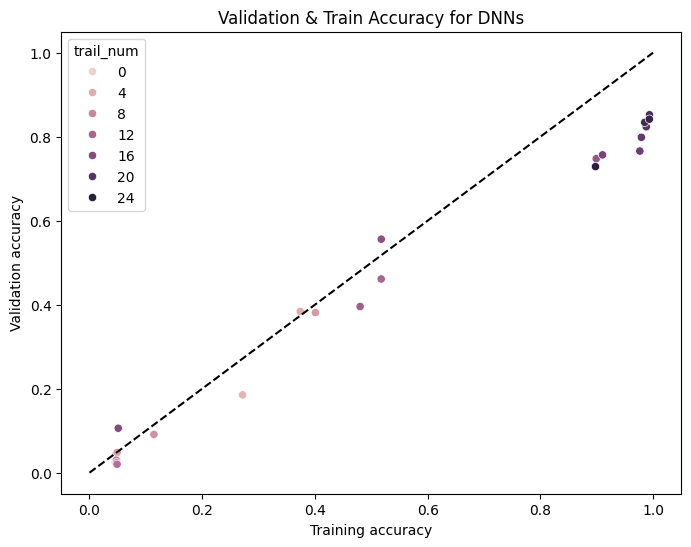

In [37]:
#
# Show the hyper-parameters of DNNs
#
dnn_vis = Visualizers('DNNs', dnn_all_res, dnn_cmp_idx)

# Report the trainable parameters used for each run
dnn_vis.report_res()

# Drawing the accuracy to illustrate the underfitting & overfitting status.
dnn_vis.draw_fitting_status()


This plot illustrates the relationship between training accuracy and validation accuracy across different DNN trials. Generally, DNN models tend to achieve a validation accuracy of around 0.8 when their training accuracy approaches 1.0, as indicated by the cluster of points in the upper-right corner.

============ Learning curves of DNNs ============


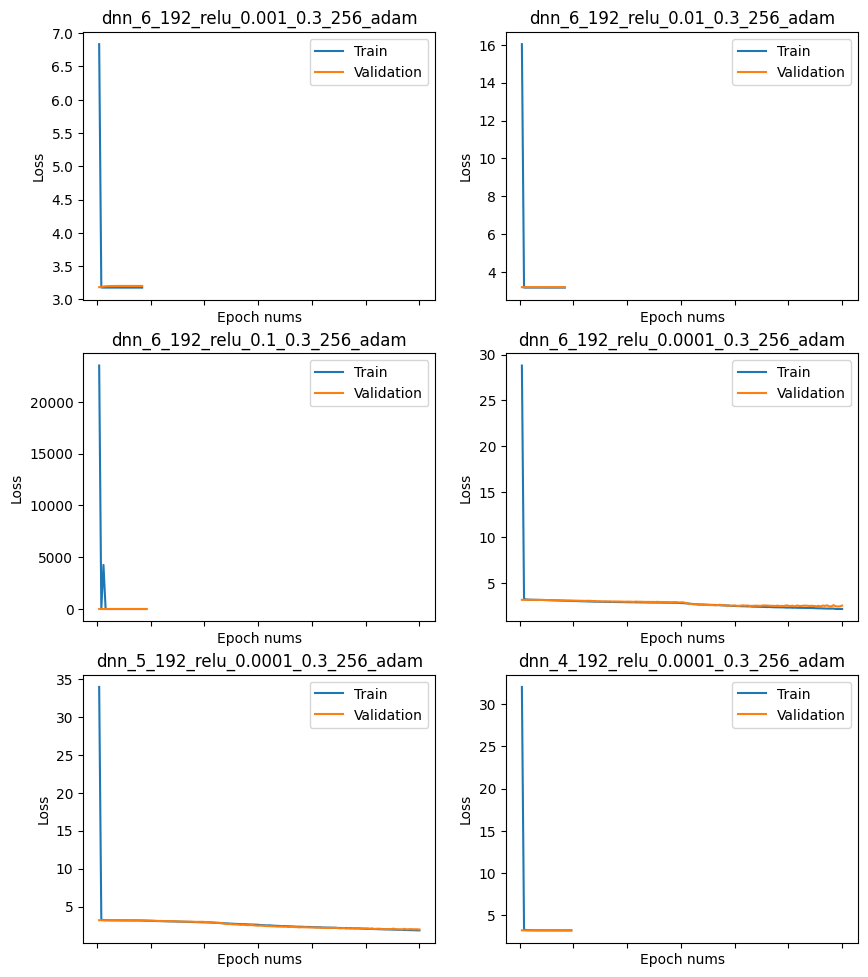

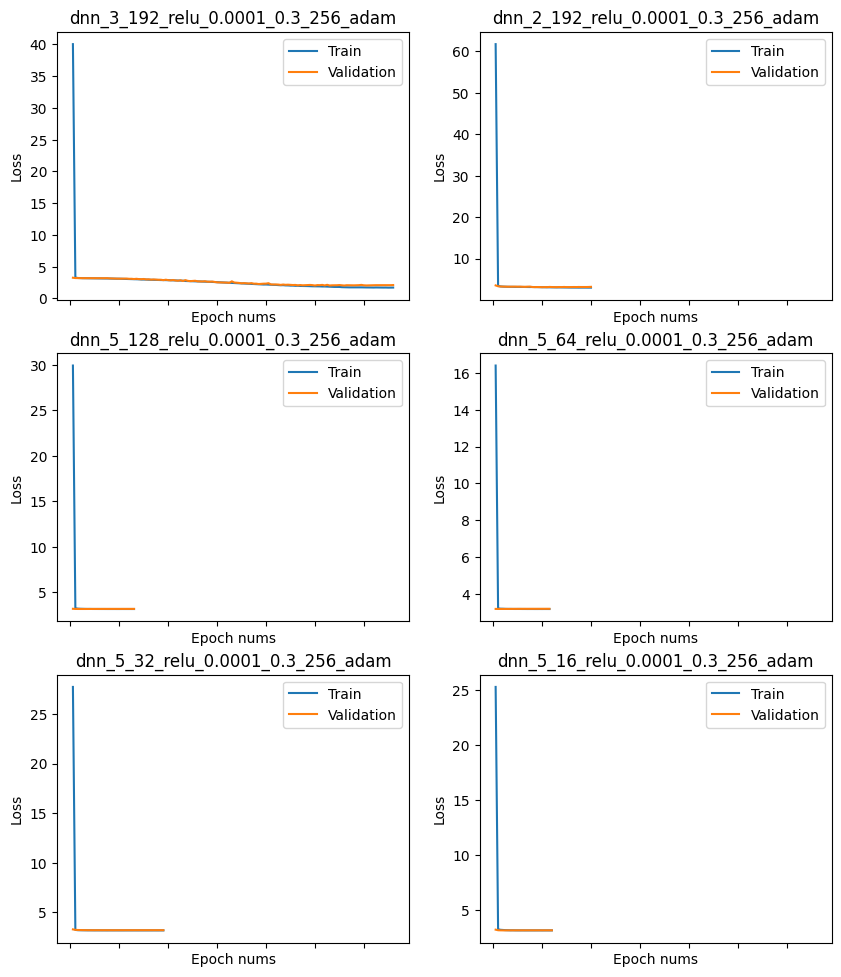

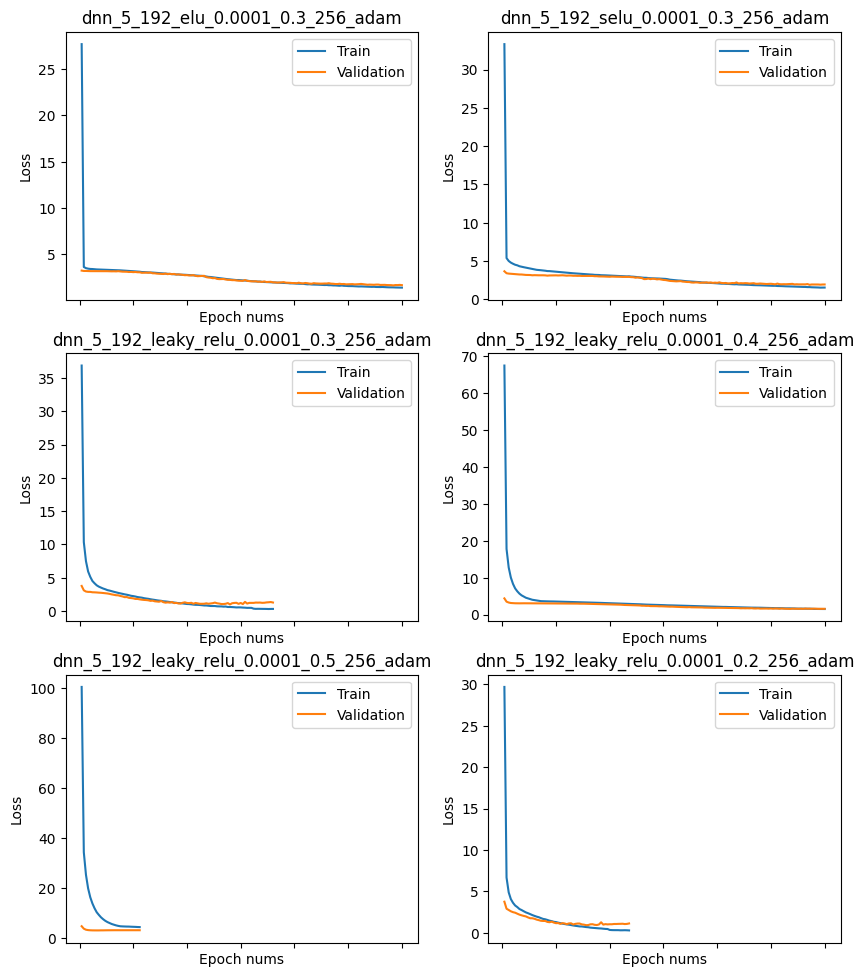

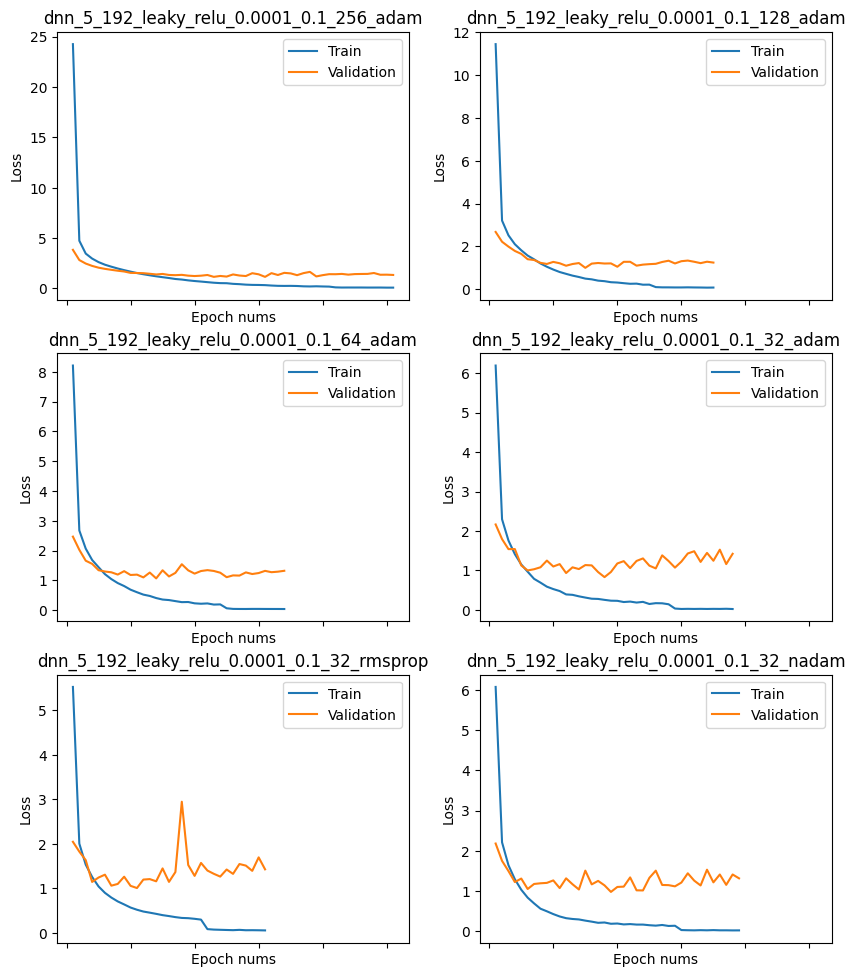

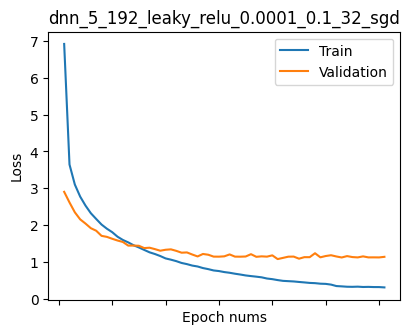

In [38]:
# Drawing the learning curve for every case.
dnn_vis.draw_curves_total()

# The title of each plot represents the hyperparameter combination,
# connected by underscores, in the following order:
#   - model_type (cnn/dnn)
#   - layer_num
#   - hidden_size
#   - actfn (activation function)
#   - learning_rate
#   - dropout_rate
#   - batch_size
#   - optimizer
# 

The curves above indicate that DNNs generally do not perform well in most cases.

============ Hyper parameters checking for DNNs ============



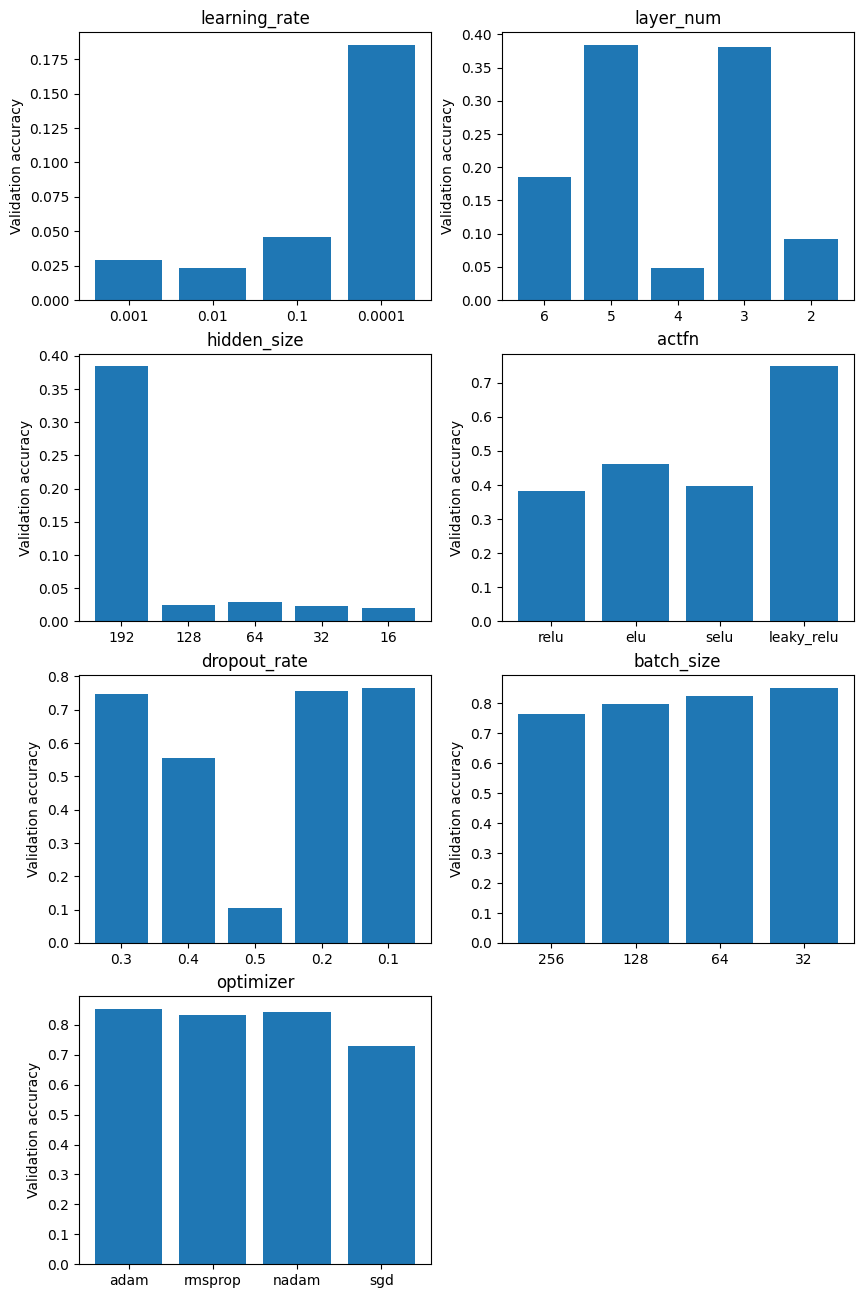

In [39]:
# Show the comparision results of hyper parameters.
dnn_vis.draw_compare()

# The highest bar indicates the best setting for each hyperparameter.

#### Hyperparameters of CNNs:

============ Model summary of CNNs ============
                                   exp_tag  parameters
0         cnn_3_16_relu_0.001_0.3_256_adam       22664
1          cnn_3_16_relu_0.01_0.3_256_adam       22664
2           cnn_3_16_relu_0.1_0.3_256_adam       22664
3        cnn_3_16_relu_0.0001_0.3_256_adam       22664
4         cnn_4_16_relu_0.001_0.3_256_adam       20376
5         cnn_5_16_relu_0.001_0.3_256_adam       21544
6         cnn_6_16_relu_0.001_0.3_256_adam       23864
7         cnn_7_16_relu_0.001_0.3_256_adam       26184
8         cnn_4_32_relu_0.001_0.3_256_adam       76568
9         cnn_4_64_relu_0.001_0.3_256_adam      296472
10         cnn_4_8_relu_0.001_0.3_256_adam        5720
11         cnn_4_4_relu_0.001_0.3_256_adam        1752
12         cnn_4_16_elu_0.001_0.3_256_adam       20376
13        cnn_4_16_selu_0.001_0.3_256_adam       20376
14  cnn_4_16_leaky_relu_0.001_0.3_256_adam       20376
15        cnn_4_16_relu_0.001_0.4_256_adam       20376
16        cnn_4_1

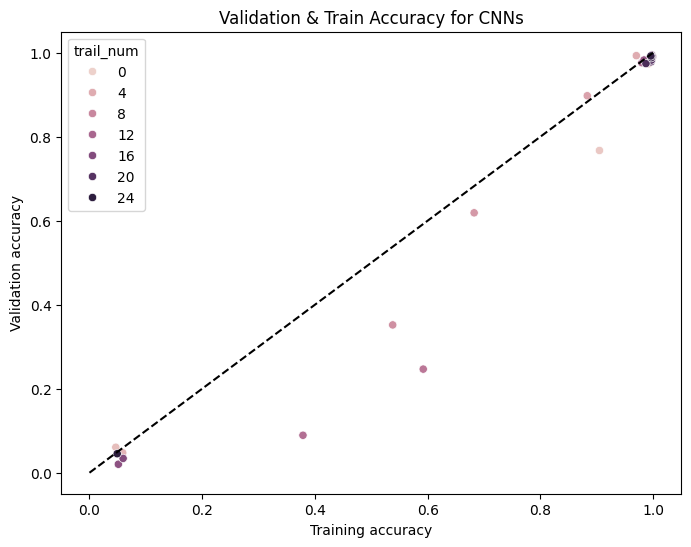

In [40]:
#
# Show the hyper-parameters of CNNs
#
cnn_vis = Visualizers('CNNs', cnn_all_res, cnn_cmp_idx)

# Report the model parameters used for each cases
cnn_vis.report_res()

# Drawing the accuracy to illustrate the underfitting & overfitting status.
cnn_vis.draw_fitting_status()


This plot illustrates the relationship between training accuracy and validation accuracy across different CNN trials. In some trials, CNN models achieve strong performance, with both training and validation accuracies approaching 1.0, as shown by the cluster of points in the upper-right corner.

============ Learning curves of CNNs ============


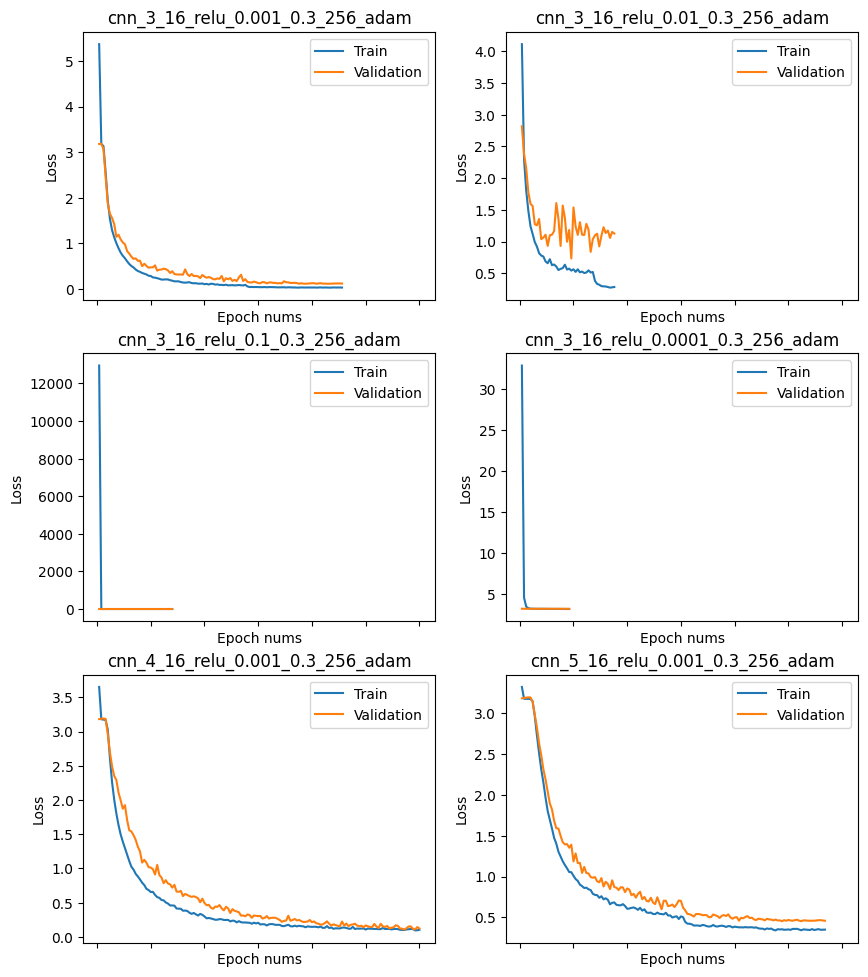

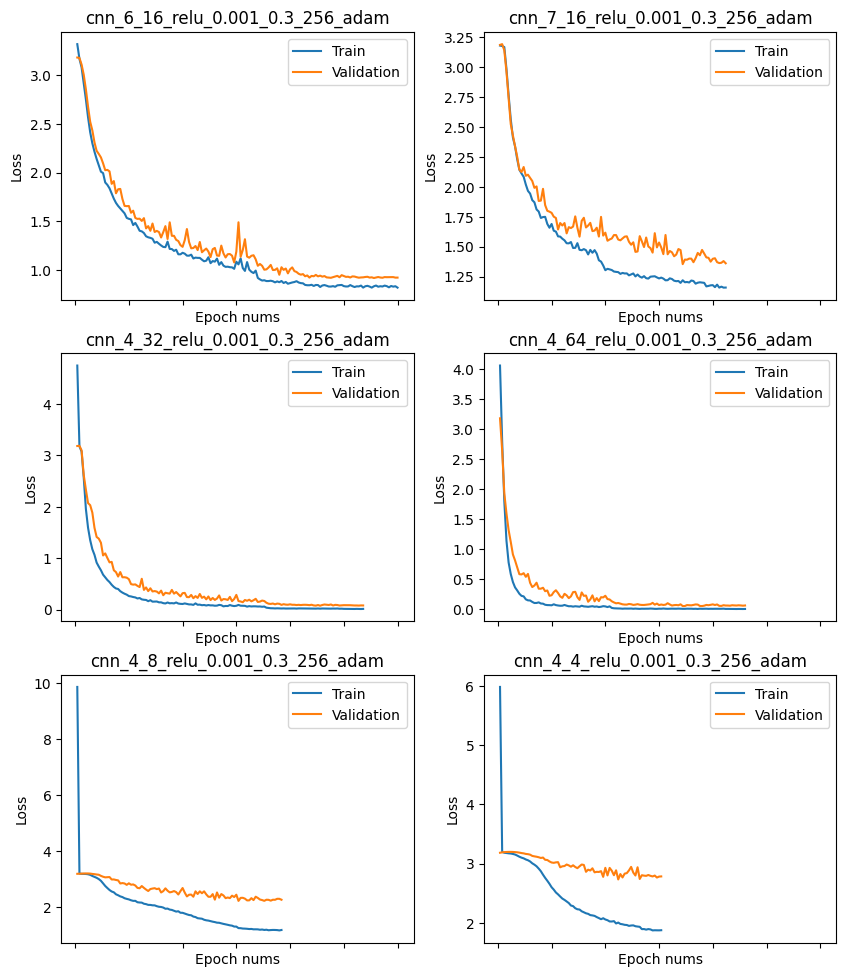

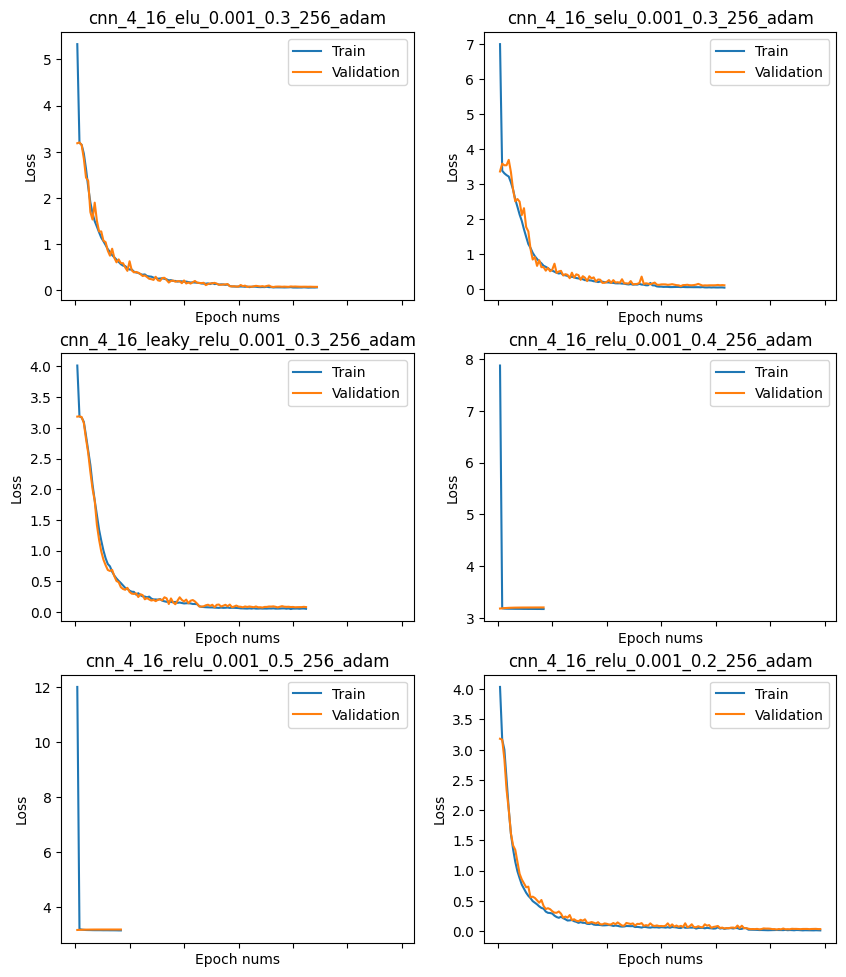

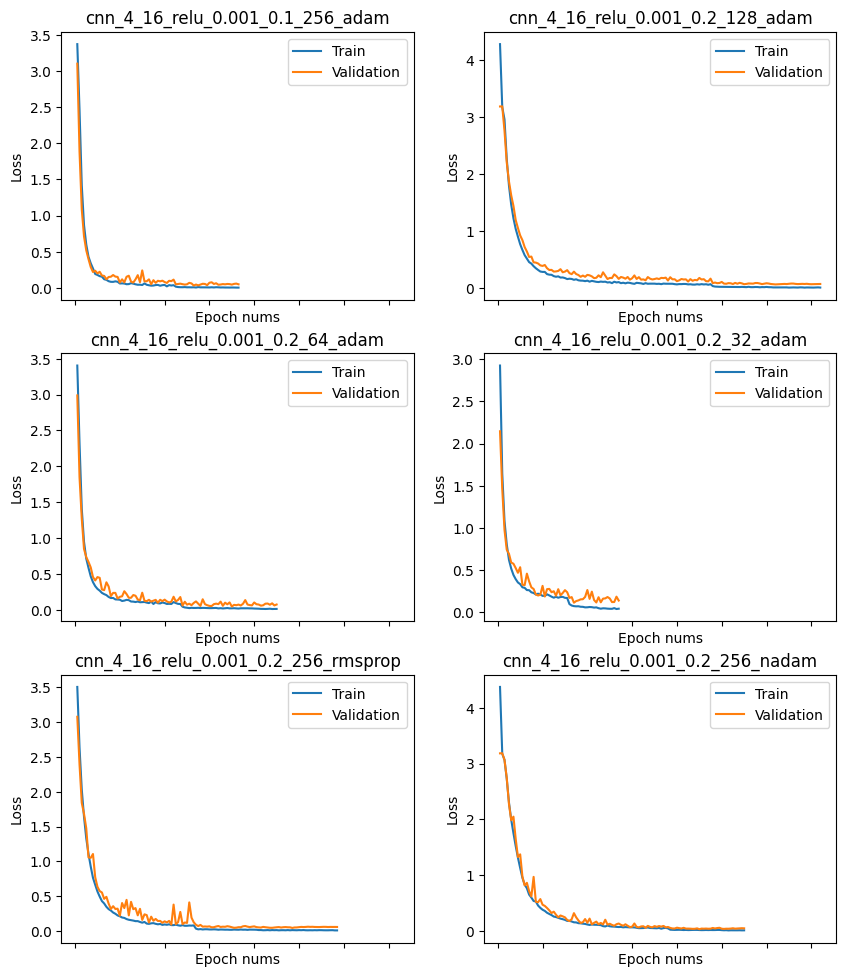

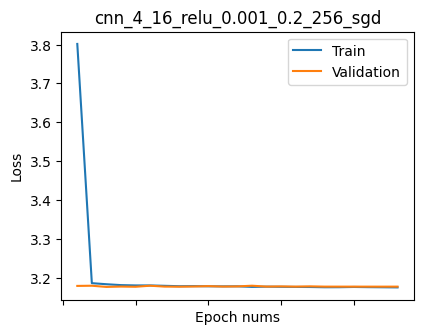

In [41]:
# Drawing the learning curve for every case.
cnn_vis.draw_curves_total()

# The title of each plot represents the hyperparameter combination,
# connected by underscores, in the following order:
#   - model_type (cnn/dnn)
#   - layer_num
#   - hidden_size
#   - actfn (activation function)
#   - learning_rate
#   - dropout_rate
#   - batch_size
#   - optimizer

Overall, the curves indicate that some CNN models achieved promising results, such as in the 18th to 24th trials.

============ Hyper parameters checking for CNNs ============



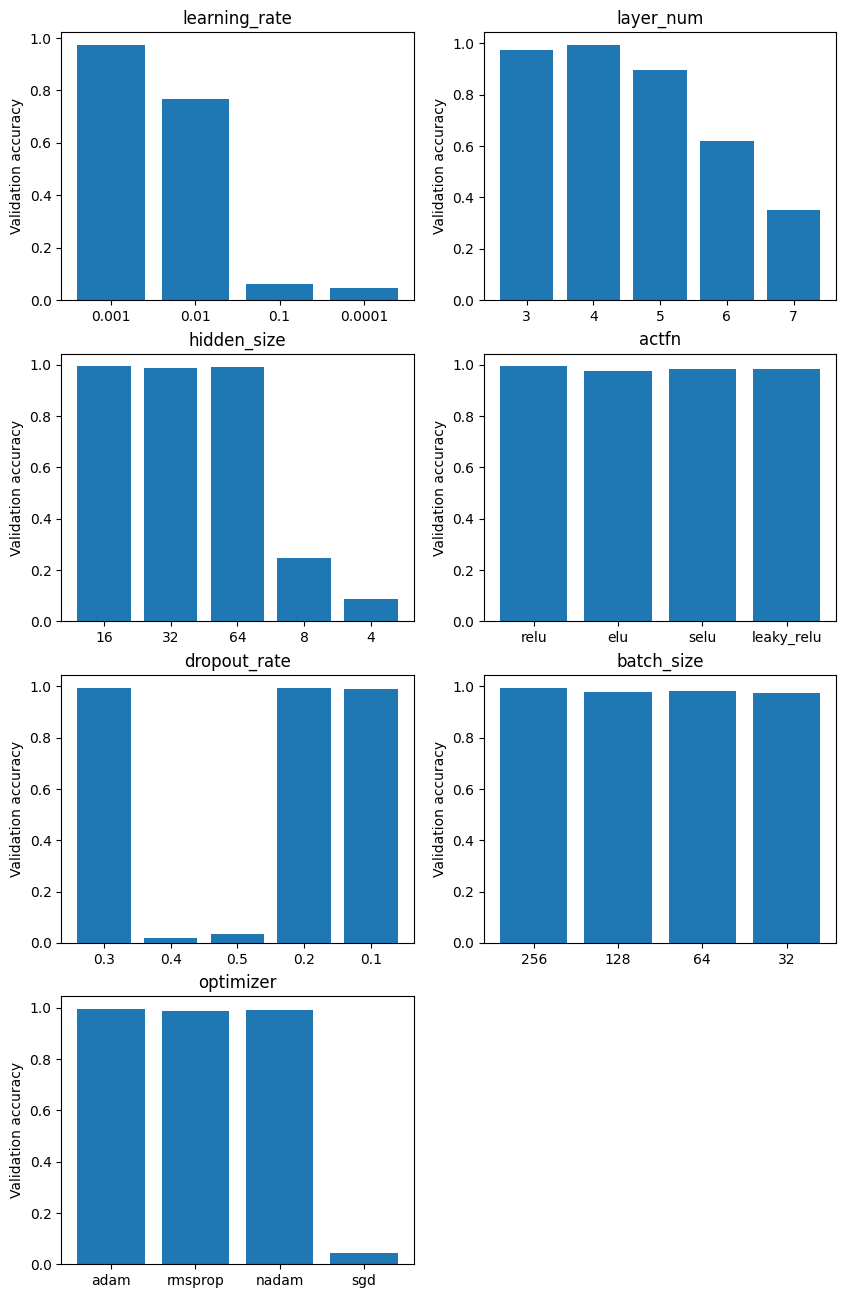

In [42]:
# Show the comparision results of hyper parameters.
cnn_vis.draw_compare()

# The highest bar indicates the best setting for each hyperparameter.

## Part 3: Final Model Selection and Reporting

### 3.1 Find the best model for the trained DNNs and CNNs.

In [43]:
best_dnn_idx, best_dnn_acc = dnn_vis.get_best_model()
best_cnn_idx, best_cnn_acc = cnn_vis.get_best_model()

best_res = dnn_all_res[best_dnn_idx] if best_dnn_acc > best_cnn_acc else cnn_all_res[best_cnn_idx]
best_path = Path(best_res['model_file'])

best_model = tf.keras.models.load_model(str(best_path))
print('Found the best model:')
name_list = ('model_type', 'layer_num', 'hidden_size', 'actfn', 
             'learning_rate', 'dropout_rate', 
             'batch_size', 'optimizer')
for name, value in zip(name_list, best_path.stem.split('_')):
    print(f'\t{name:<20}{value}')
best_model.summary()

Found the best model:
	model_type          cnn
	layer_num           4
	hidden_size         16
	actfn               relu
	learning_rate       0.001
	dropout_rate        0.2
	batch_size          256
	optimizer           adam
Model: "cnn-4-16-relu-0.2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        800       
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        6416      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 16)        0         
                        

### 3.2 Showing the information that the clients have requested:

 The information that the clients have requested:
 
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)

In [44]:
#
# Used for printing dictionary
#
def dict_print(input_dict, indent=0):
    """For dictionary printing."""
    indent_str = '\t' * indent
    key_len = max(len(key) for key in input_dict)
    for key, value in input_dict.items():
        key_str = (key + ': ').ljust(key_len + 2)
        print(f'{indent_str}{key_str}', end='', flush=True)
        if isinstance(value, dict):
            print('')
            dict_print(value, indent=indent + 1)
        else:
            print(value)
    pass


#
# Used for computing metrics.
#
def metrics_computation(model, X_test, y_test, cm_title=""):
    """Computing the metrics with given model and true value"""
    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)
    
    # Compute accuracy for each class. For class i,
    # TP: a_ii
    # FN: \sum_{j != i} a_ij
    # FP: \sum_{j != i} a_ji
    # TN: \sum_{j, k != i} a_jk
    # We selected "recall" to illustrate model performance
    # as it aligns with what we believe the clients prioritize.
    tp_count = np.diagonal(cm)
    fn_count = cm.sum(axis=1) - tp_count
    # fp_count = cm.sum(axis=0) - tp_count
    # tn_count = cm.sum() - tp_count - fn_count - fp_count
    individual_acc = tp_count / (tp_count + fn_count)
    # individual_acc = (tp_count + tn_count) / cm.sum()

    # Compute overall acc
    overall_acc = tp_count.sum() / cm.sum()

    if cm_title != "":
        fig = plt.figure(figsize=(12, 12))
        labels = [LetterConverter.idx2cap(x) for x in range(24)]
        cm_scale = cm / cm.sum(axis=1)
        ax = seaborn.heatmap(cm_scale, annot=True, fmt='.0%', cmap='jet', 
                             xticklabels=labels, yticklabels=labels)
        ax.set_title(f'{cm_title}-(total_acc: {overall_acc:.0%})')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    return individual_acc, overall_acc, cm


The information for clients:
	Unbiased median accuracy:                100.00%
	Letter with highest individual accuracy: ('A', '100.00%')
	Letter with lowest individual accuracy:  ('T', '84.85%')
	Three most common single types of error: 
		Top 1: T -> X (Predicting T as X)
		Top 2: B -> K (Predicting B as K)
		Top 3: T -> L (Predicting T as L)


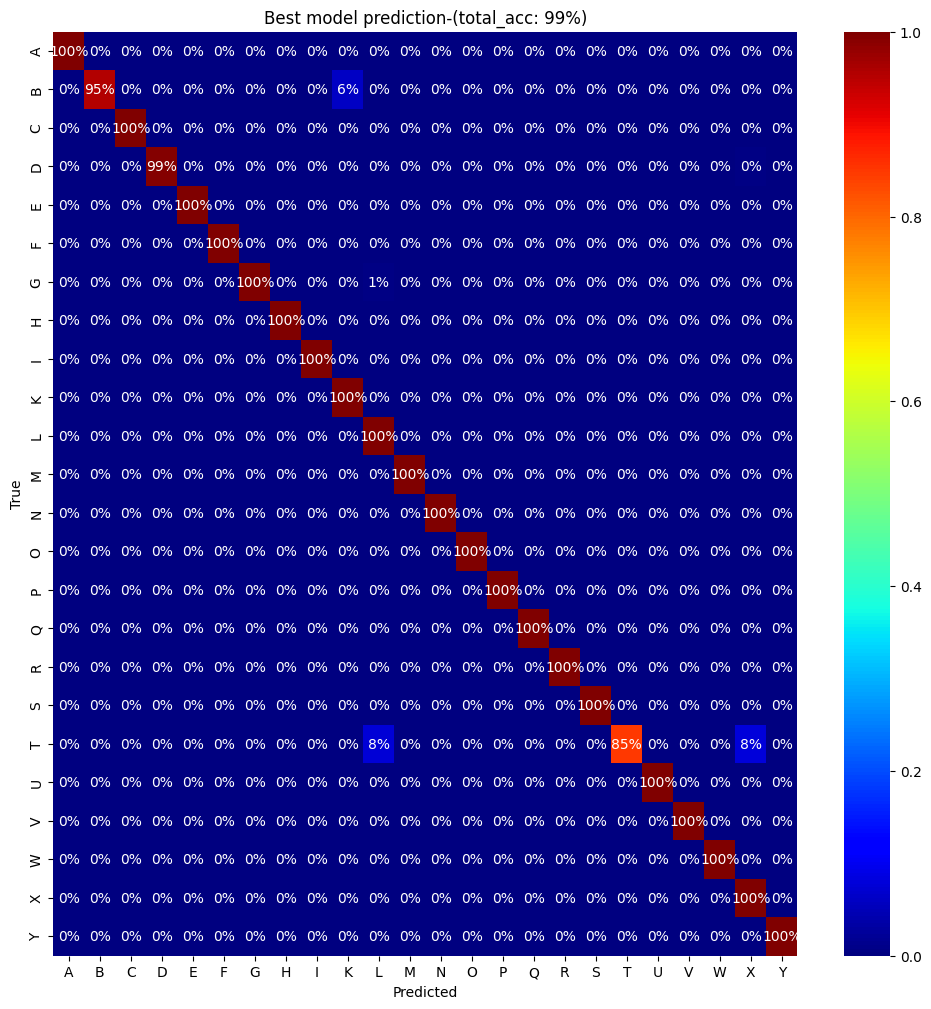

In [45]:
class_acc, overall_acc, cm = metrics_computation(best_model, 
                                                 X_test_p, 
                                                 y_test_p,
                                                 cm_title='Best model prediction')
cm_bk = cm.copy()
np.fill_diagonal(cm_bk, 0)
top_i, top_j = np.unravel_index(cm_bk.reshape(-1).argsort()[:-4:-1],
                                cm_bk.shape)
best_idx = class_acc.argmax()
worst_idx = class_acc.argmin()

client_report = {
    'Unbiased median accuracy': 
        f'{np.median(class_acc):.2%}',
    'Letter with highest individual accuracy': 
        (LetterConverter.idx2cap(class_acc.argmax()), f'{class_acc.max():.2%}'),
    'Letter with lowest individual accuracy': 
        (LetterConverter.idx2cap(class_acc.argmin()), f'{class_acc.min():.2%}'),
    'Three most common single types of error': {}
}
for idx, (i, j) in enumerate(zip(top_i, top_j)):
    report_str = f'{LetterConverter.idx2cap(i)} -> {LetterConverter.idx2cap(j)}'
    report_str += f' (Predicting {LetterConverter.idx2cap(i)} as {LetterConverter.idx2cap(j)})'
    client_report['Three most common single types of error'][f'Top {idx + 1}'] = report_str

print('The information for clients:')
dict_print(client_report, indent=1)

### 3.3 My manager asked me to report:

- the overall mean accuracy
- the accuracy for each individual letter
- a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation

Target:

- Median accuracy will exceed 94% overall
- Better than 85% for every individual letter

In [46]:
manager_report = {
    'Overall mean accuracy': f'{overall_acc:.2%}',
    'Accuracy for each letter': {}
}
for idx, acc in enumerate(class_acc):
    manager_report['Accuracy for each letter'][f'{LetterConverter.idx2cap(idx)}'] = f'{acc:.2%}'

print('The information for my manager:')
dict_print(manager_report, indent=1)

The information for my manager:
	Overall mean accuracy:    99.16%
	Accuracy for each letter: 
		A: 100.00%
		B: 95.36%
		C: 100.00%
		D: 99.49%
		E: 100.00%
		F: 100.00%
		G: 99.64%
		H: 100.00%
		I: 100.00%
		K: 100.00%
		L: 100.00%
		M: 100.00%
		N: 100.00%
		O: 100.00%
		P: 100.00%
		Q: 100.00%
		R: 100.00%
		S: 100.00%
		T: 84.85%
		U: 100.00%
		V: 100.00%
		W: 100.00%
		X: 100.00%
		Y: 100.00%


### 3.4 Summary

> Our model achieves a median accuracy of 100.0%, with an accuracy of 84.85% for the worst-performing letter class, 'T'. While we have met the client's requirement of 94% for median accuracy, we did not meet the 85% accuracy threshold for every letter.

My short written recommendation (100 words maximum):

> Although we didn’t meet the client’s 85% accuracy requirement for every letter, our model is very close (with only 'T' slightly below at 84.85%). We believe with further optimization, these goals are achievable. Potential improvements include:
> 
> - **Hyperparameter tuning**: Further refine the model with targeted adjustments.
> - **Utilization of Prior Knowledge**: Implement techniques like foreground segmentation and gesture recognition.
> - **Exploring advanced models**: Consider models with more complex architectures, such as ResNet or DenseNet.
